In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat

In [2]:
import pathlib
import os

In [3]:
dir_path = pathlib.Path.cwd().parent
folder_path = dir_path / "data" / "bitcoin"
file_name = "BTC-Daily.csv"
df= pd.read_csv(os.path.join(folder_path, file_name),parse_dates=['date'],index_col='date')
print(df)

                  unix   symbol      open      high       low     close  \
date                                                                      
2022-03-01  1646092800  BTC/USD  43221.71  43626.49  43185.48  43185.48   
2022-02-28  1646006400  BTC/USD  37717.10  44256.08  37468.99  43178.98   
2022-02-27  1645920000  BTC/USD  39146.66  39886.92  37015.74  37712.68   
2022-02-26  1645833600  BTC/USD  39242.64  40330.99  38600.00  39146.66   
2022-02-25  1645747200  BTC/USD  38360.93  39727.97  38027.61  39231.64   
...                ...      ...       ...       ...       ...       ...   
2014-12-02  1417478400  BTC/USD    378.39    382.86    375.23    379.25   
2014-12-01  1417392000  BTC/USD    376.40    382.31    373.03    378.39   
2014-11-30  1417305600  BTC/USD    376.57    381.99    373.32    373.34   
2014-11-29  1417219200  BTC/USD    376.42    386.60    372.25    376.72   
2014-11-28  1417132800  BTC/USD    363.59    381.34    360.57    376.28   

              Volume BTC

In [4]:
df = df.loc[ :'2021-01-01']
df

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07
...,...,...,...,...,...,...,...,...
2021-01-05,1609804800,BTC/USD,32054.23,34500.00,29936.26,34039.05,14806.496507,5.039991e+08
2021-01-04,1609718400,BTC/USD,33068.83,33669.76,27734.00,32005.88,22446.940005,7.184341e+08
2021-01-03,1609632000,BTC/USD,32216.51,34800.00,31977.45,33097.83,14160.581280,4.686845e+08


In [5]:
import seaborn as sns

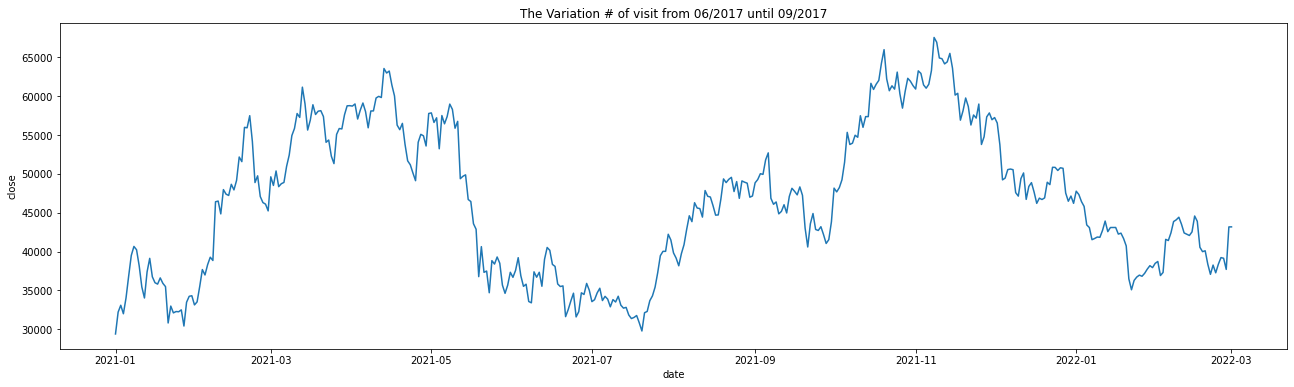

In [6]:
plt.figure(figsize=(22,6))
sns.lineplot(x=df.index, y=df['close'])
plt.title('The Variation # of visit from 06/2017 until 09/2017')
plt.show()

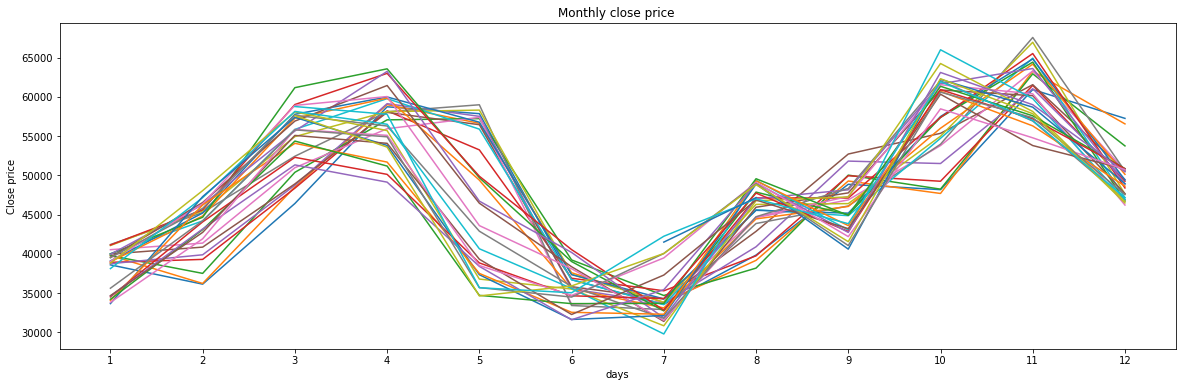

In [7]:
# i'm going to create a pivot table to plot the monthly temperatures through the years
df['day'] = df.index.day
df['month'] = df.index.month
pivot = pd.pivot_table(df, values='close', index='month', columns='day', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Monthly close price ')
plt.xlabel('days')
plt.ylabel('Close price')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

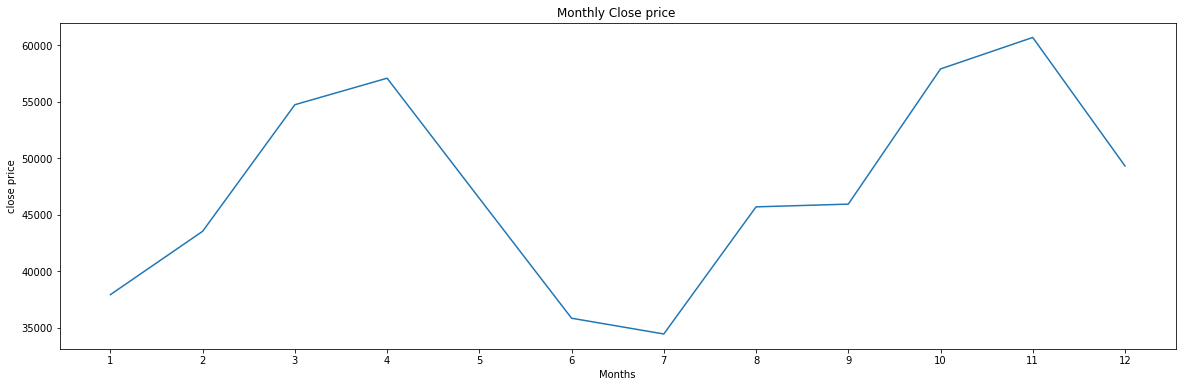

In [8]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Close price ')
plt.xlabel('Months')
plt.ylabel('close price')
plt.xticks([x for x in range(1,13)])
plt.show()

In [36]:
df

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,day,month
date,,,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,1,3
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,28,2
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,27,2
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,26,2
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,25,2
...,...,...,...,...,...,...,...,...,...,...
2021-01-05,1609804800,BTC/USD,32054.23,34500.00,29936.26,34039.05,14806.496507,5.039991e+08,5,1
2021-01-04,1609718400,BTC/USD,33068.83,33669.76,27734.00,32005.88,22446.940005,7.184341e+08,4,1
2021-01-03,1609632000,BTC/USD,32216.51,34800.00,31977.45,33097.83,14160.581280,4.686845e+08,3,1


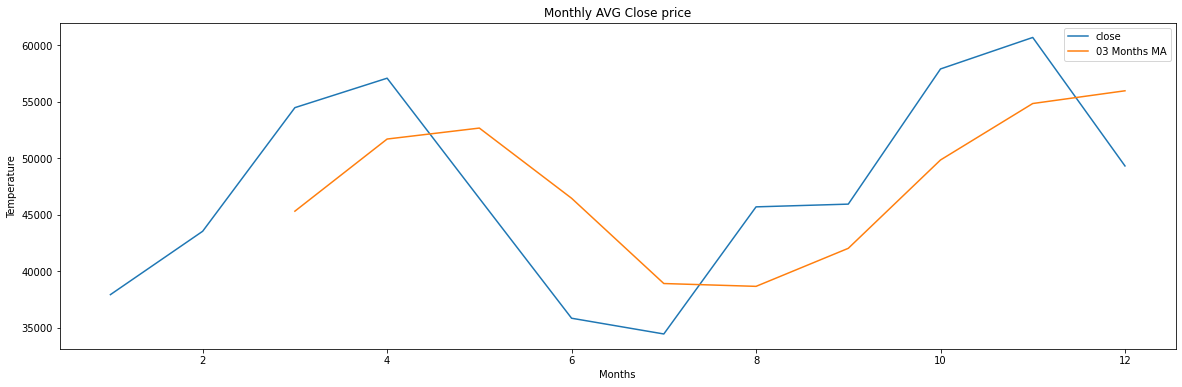

In [9]:
year_avg = pd.pivot_table(df, values='close', index='month', aggfunc='mean')
year_avg['03 Months MA'] = year_avg['close'].rolling(3).mean()
year_avg[['close','03 Months MA']].plot(figsize=(20,6))
plt.title('Monthly AVG Close price')
plt.xlabel('Months')
plt.ylabel('Temperature')
#plt.xticks([x for x in range(1900,2012,3)])
plt.show()

In [10]:
train = df[:-60].copy()
val = df[-60:-12].copy()
test = df[-12:].copy()

In [11]:
train = df.reset_index(drop=True)[:-60].copy()
val = df.reset_index(drop=True)[-60:-12].copy()
test = df.reset_index(drop=True)[-12:].copy()

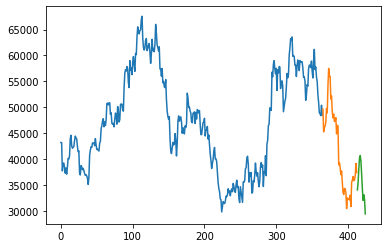

In [12]:
# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
train["close"].plot(ax=ax)
val["close"].plot(ax=ax)
test["close"].plot(ax=ax)
plt.show()

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
# Excluding the first line, as it has NaN values
baseline = val['close'].shift()
baseline.dropna(inplace=True)
baseline.head()

366    49629.33
367    45240.96
368    46109.98
369    46314.83
370    47088.58
Name: close, dtype: float64

In [50]:
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

# Using the function with the baseline values
rmse_base = measure_rmse(val.iloc[1:,0],baseline)
print(f'The RMSE of the baseline that we will try to diminish is {round(rmse_base,4)} celsius degrees')

The RMSE of the baseline that we will try to diminish is 1612441896.2418 celsius degrees


In [51]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Rio de Janeiro Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                  -1.8862
p-value                          0.3386
Lags Used                        0.0000
Number of Observations Used    364.0000
Critical Value (1%)             -3.4484
Critical Value (5%)             -2.8695
Critical Value (10%)            -2.5710
dtype: float64

The Test Statistics is higher than the Critical Value of 5%.
The serie isn't stationary


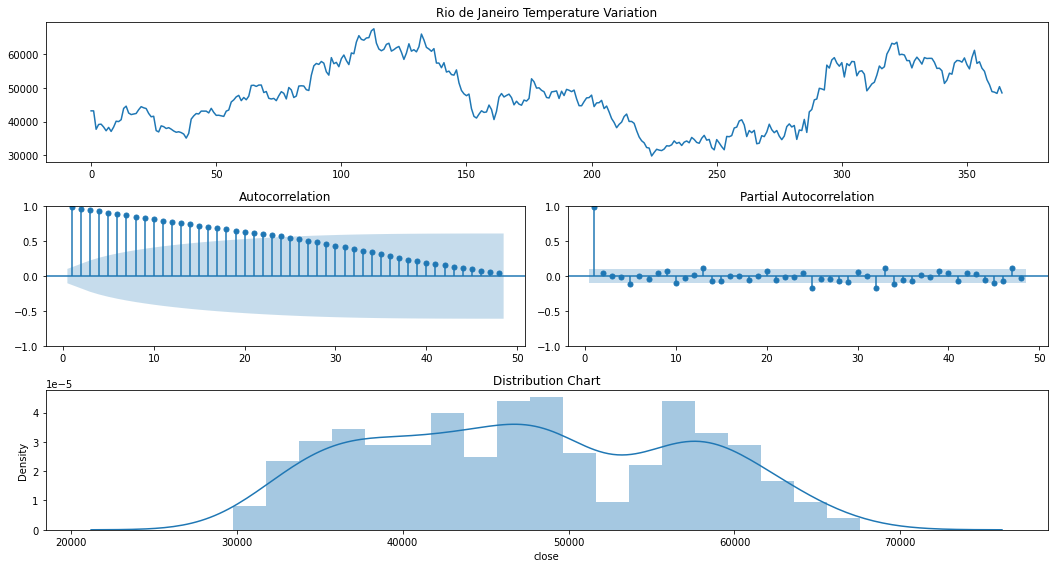

In [52]:
check_stationarity(train['close'])

In [31]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
##Originally data
result_c = adfuller(df['close'],regression='c')
result_ct = adfuller(df['close'],regression='ct')
result_ctt = adfuller(df['close'],regression='ctt')
result_nc = adfuller(df['close'],regression='nc')
##Diff data
result_Diff_c = adfuller(df['close'].diff().dropna(),regression='c')
result_Diff_ct = adfuller(df['close'].diff().dropna(),regression='ct')
result_Diff_ctt = adfuller(df['close'].diff().dropna(),regression='ctt')
result_Diff_nc = adfuller(df['close'].diff().dropna(),regression='nc')

In [32]:
models = pd.DataFrame({
    'ADFtest': [ 'Constant only', 'Constant and trend', 'constant, and linear and quadratic trend', 'no constant no trend',
                'Constant only Diff', 'Constant and trend Diff', 'constant, and linear and quadratic trend Diff', 'no constant no trend Diff'],
    'Pvalue': [result_c[1],result_ct[1],result_ctt[1],result_nc[1],result_Diff_c[1],result_Diff_ct[1],result_Diff_ctt[1],result_Diff_nc[1]]})
models["Decision"]= np.where( models["Pvalue"] > 0.05 , "The H0 of DF test accepted the serie not stationry","The H0 of DF test rejected the serie stationry")
models                 

,ADFtest,Pvalue,Decision
0,Constant only,0.448515,The H0 of DF test accepted the serie not stati...
1,Constant and trend,0.728434,The H0 of DF test accepted the serie not stati...
2,"constant, and linear and quadratic trend",0.856321,The H0 of DF test accepted the serie not stati...
3,no constant no trend,0.421654,The H0 of DF test accepted the serie not stati...
4,Constant only Diff,0.000000,The H0 of DF test rejected the serie stationry
5,Constant and trend Diff,0.000000,The H0 of DF test rejected the serie stationry
6,"constant, and linear and quadratic trend Diff",0.000000,The H0 of DF test rejected the serie stationry
7,no constant no trend Diff,0.000000,The H0 of DF test rejected the serie stationry


Results of Dickey-Fuller Test:
Test Statistic                 -20.0128
p-value                          0.0000
Lags Used                        0.0000
Number of Observations Used    363.0000
Critical Value (1%)             -3.4485
Critical Value (5%)             -2.8695
Critical Value (10%)            -2.5710
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


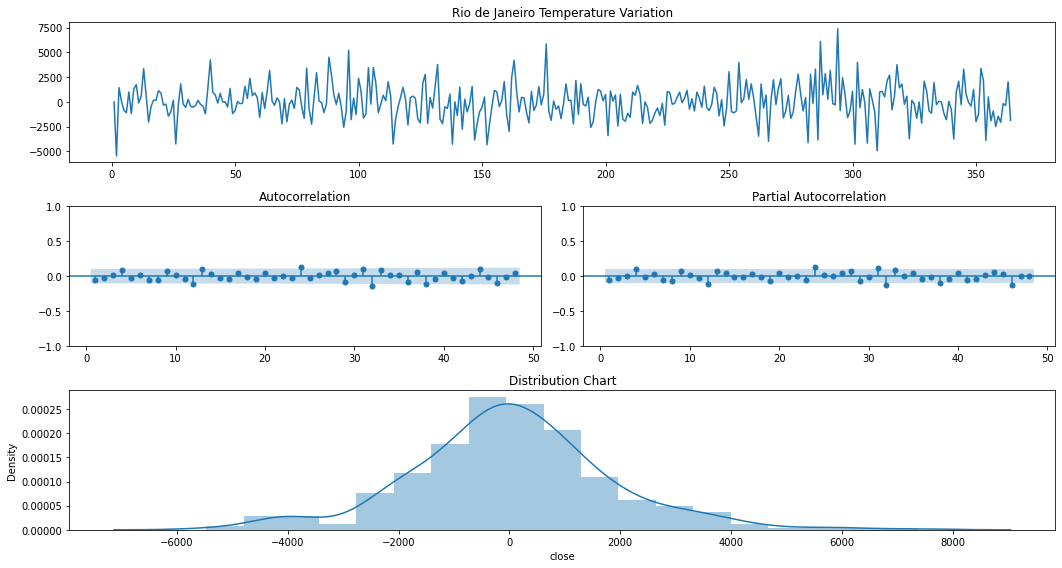

In [53]:
check_stationarity(train['close'].diff(1).dropna())

In [33]:
resDiff = sm.tsa.arma_order_select_ic(train['close'], max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (3, 2) is the best.


In [35]:
arima = sm.tsa.statespace.SARIMAX(train['close'],order=(3,1,2),seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,)
model = arima.fit(disp=-1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  365
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -3214.978
Date:                Fri, 24 Feb 2023   AIC                           6441.956
Time:                        17:06:24   BIC                           6465.289
Sample:                             0   HQIC                          6451.233
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4846      0.601     -0.807      0.420      -1.662       0.693
ar.L2         -0.3959      0.451     -0.877      0.380      -1.280       0.489
ar.L3         -0.0541      0.063     -0.857      0.391      -0.178       0.070
ma.L1          0.4340      0.599      0.724      0.469      -0.741       1.609
ma.L2          0.3232      0.468      0.690      0.490      -0.594       1.241
sigma2      3.225e+06   1.95e+05     16.499      0.000    2.84e+06    3.61e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.34
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

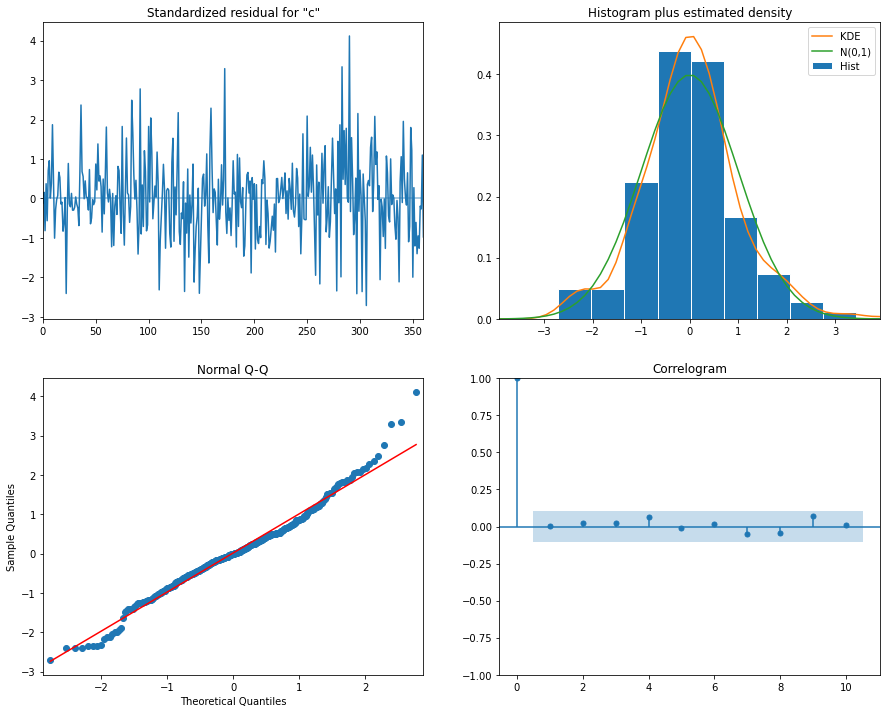

In [45]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [55]:
# Generate predictions and with , dynamic=True
one_step_forecast = model.get_prediction(start=-356,dynamic=True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

In [56]:
mean_forecast

60     47743.479028
61     47716.513563
62     47719.912872
63     47730.776686
64     47725.624555
           ...     
360    47725.491625
361    47725.491625
362    47725.491625
363    47725.491625
364    47725.491625
Name: predicted_mean, Length: 305, dtype: float64

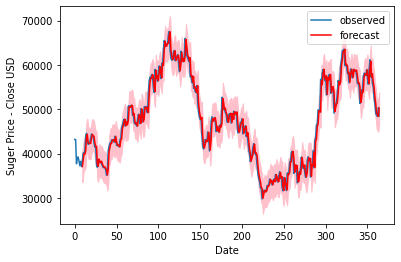

In [44]:
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

plt.plot(train.index, train['close'], label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Suger Price - Close USD')
plt.legend()
plt.show()

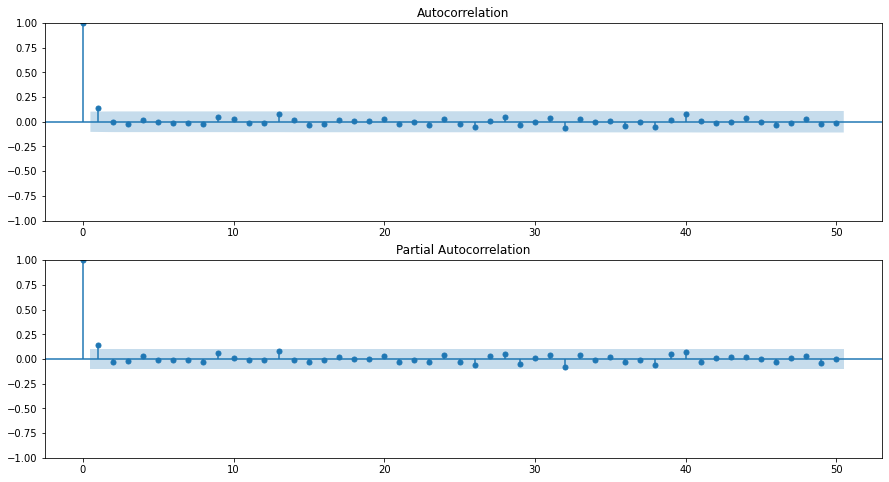

In [42]:
res = model.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [59]:
forecast = model.get_forecast(steps=20)
mean_forecast = forecast.predicted_mean
mean_forecast

365    48520.498611
366    48581.804564
367    48651.232873
368    48593.091459
369    48590.465996
370    48611.001012
371    48605.233376
372    48600.040822
373    48603.729945
374    48604.309766
375    48602.849121
376    48603.127902
377    48603.539698
378    48603.308766
379    48603.242575
380    48603.343804
381    48603.333441
382    48603.301967
383    48603.315848
384    48603.322142
Name: predicted_mean, dtype: float64

In [53]:
arima_pred = model.predict(start = len(train), end = len(df)-1, typ="levels",dynamic=True).rename("ARIMA Predictions")
arima_pred

365    48520.498611
366    48581.804564
367    48651.232873
368    48593.091459
369    48590.465996
370    48611.001012
371    48605.233376
372    48600.040822
373    48603.729945
374    48604.309766
375    48602.849121
376    48603.127902
377    48603.539698
378    48603.308766
379    48603.242575
380    48603.343804
381    48603.333441
382    48603.301967
383    48603.315848
384    48603.322142
385    48603.315299
386    48603.315373
387    48603.317706
388    48603.316916
389    48603.316371
390    48603.316822
391    48603.316862
392    48603.316693
393    48603.316735
394    48603.316779
395    48603.316750
396    48603.316744
397    48603.316756
398    48603.316754
399    48603.316751
400    48603.316753
401    48603.316753
402    48603.316752
403    48603.316753
404    48603.316753
405    48603.316753
406    48603.316753
407    48603.316753
408    48603.316753
409    48603.316753
410    48603.316753
411    48603.316753
412    48603.316753
413    48603.316753
414    48603.316753


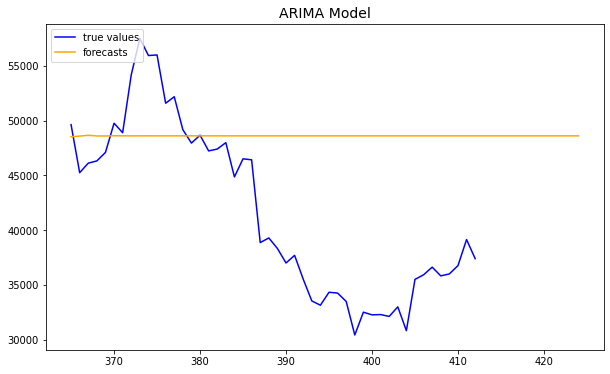

In [54]:
plt.figure(figsize = (10,6))
plt.plot(val["close"], label = "true values", color = "blue")
plt.plot(arima_pred,label = "forecasts", color='orange')
plt.title("ARIMA Model", size = 14)
plt.legend(loc = 'upper left')
plt.show()